#El Rapido

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GDP=pd.read_csv("../../Data_Fred/gdp.csv", index_col=0, parse_dates=True)
Inflation=pd.read_csv("../../Data_Fred/inflation.csv", index_col=0, parse_dates=True)
Interest_Rate=pd.read_csv("../../Data_Fred/int_rate.csv", index_col=0, parse_dates=True)

<Axes: title={'center': 'GDP'}, xlabel='observation_date'>

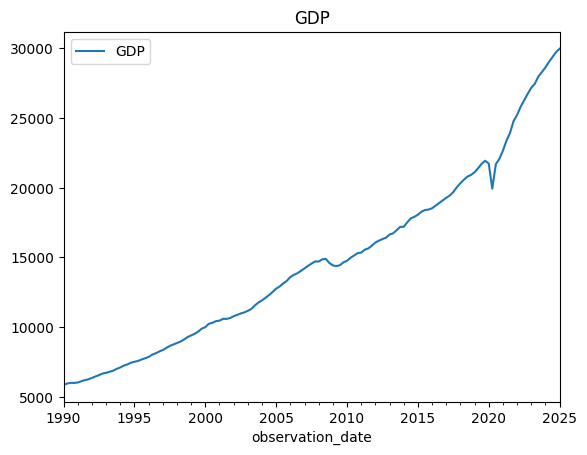

In [3]:
GDP.plot(title='GDP')

In [4]:
mac_data = pd.concat([Interest_Rate, Inflation, GDP], axis=1)
mac_data.columns = ['Int', 'Inf', 'GDP']

In [5]:
mac_data=mac_data.dropna()

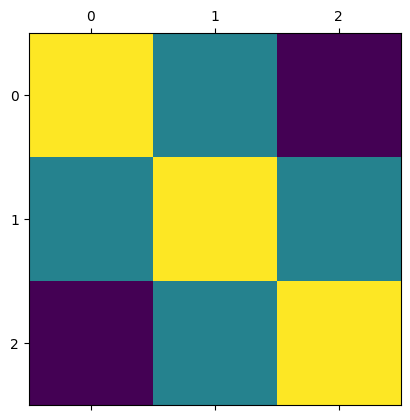

In [6]:
plt.matshow(mac_data.corr())
plt.show()

In [7]:
mac_data.diff().dropna()

,Int,Inf,GDP
observation_date,,,
1990-04-01,0.33,-0.2,87.327
1990-07-01,0.02,-0.4,55.088
1990-10-01,-0.07,-0.7,-10.383
1991-01-01,-2.72,0.2,30.445
1991-04-01,0.95,-0.5,91.684
...,...,...,...
2024-01-01,0.00,1.7,327.102
2024-04-01,0.00,-0.9,392.645
2024-07-01,0.00,-0.6,358.200


In [8]:
from econometron.utils.data_preparation import TimeSeriesProcessor

In [9]:
TSP=TimeSeriesProcessor(mac_data,method='log_diff',analysis=True,plot=True)

Processing column: Int
  Int final stationarity: False
Processing column: Inf
  Inf final stationarity: False
Processing column: GDP
  GDP final stationarity: False


In [10]:
data=TSP.get_transformed_data()

In [11]:
data

,Int,Inf,GDP
observation_date,,,
1990-10-01,0.027445,-0.034249,17.231298
1991-01-01,-0.383026,0.276350,0.847980
1991-04-01,0.955959,-0.367819,-0.043254
1991-07-01,-0.737275,0.408404,-0.416488
1991-10-01,0.022985,-0.457194,0.067666
...,...,...,...
2024-01-01,-0.045949,0.378615,0.008429
2024-04-01,0.048412,-1.305591,0.002940
2024-07-01,0.000000,0.738423,-0.004382


In [12]:
TSP.get_stationary_info()

{'Int': {'transformation_applied': 'log_diff',
  'is_stationary': False,
  'p_value': 1.0,
  'adf_statistic': nan,
  'error': 'High variance instability (ratio: 114.19)'},
 'Inf': {'transformation_applied': 'log_diff',
  'is_stationary': False,
  'p_value': 1.0,
  'adf_statistic': nan,
  'error': 'High variance instability (ratio: 168.86)'},
 'GDP': {'transformation_applied': 'log_diff',
  'is_stationary': False,
  'p_value': 1.0,
  'adf_statistic': nan,
  'error': 'High variance instability (ratio: 1100.52)'}}

<Axes: title={'center': 'Transformed Data'}, xlabel='observation_date'>

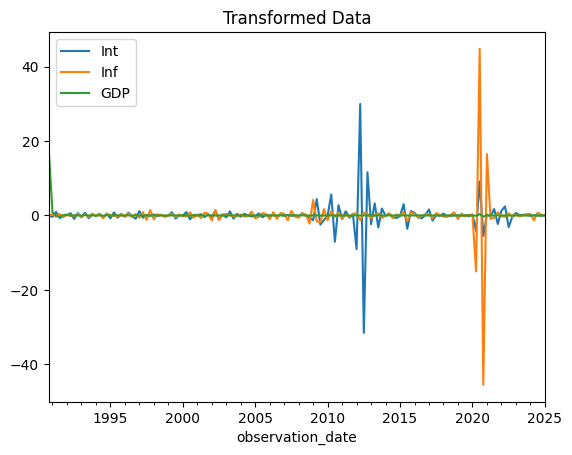

In [13]:
data.plot(title='Transformed Data')

In [14]:
from econometron.Models.VectorAutoReg.VAR import VAR

In [25]:
vm=VAR(data,max_p=10,check_stationarity=True,plot=True)

Performing stationarity checks...

Column: Int
Verdict , The serie : Int is stationary

Column: Inf
Verdict , The serie : Inf is stationary

Column: GDP
Verdict , The serie : GDP is stationary


In [26]:
vm.order_select()

,p,aic,bic,hqic
0,10,-5.520405,-3.547691,-4.718743
1,9,-5.429859,-3.648053,-4.705777
2,8,-5.368254,-3.777355,-4.721752
3,7,-5.210752,-3.810762,-4.641831
4,6,-4.937258,-3.728175,-4.445916
5,5,-4.850976,-3.832800,-4.437214
6,4,-4.633141,-3.805874,-4.296960
7,3,-3.591218,-2.954859,-3.332617
8,2,-1.908792,-1.463341,-1.727772
9,1,-1.118973,-0.864429,-1.015533


Selecting only columns with numeric data
VAR(10) Coefficient Table

Lag 1 Parameters:
----------------------------------------------------------------------------------------------------
Variable       | Int_coef     Int_se     Int_t    Int_p   | Inf_coef     Inf_se     Inf_t    Inf_p   | GDP_coef     GDP_se     GDP_t    GDP_p   
----------------------------------------------------------------------------------------------------
Int            |    -0.0531     0.1512  -0.3513   0.7253|    -0.0339     0.1843  -0.1839   0.8541|     0.0005     0.0021   0.2605   0.7944
Inf            |    -2.0827     0.1031 -20.2070   0.0000|    -0.1502     0.1257  -1.1954   0.2319|    -0.0013     0.0014  -0.9284   0.3532
GDP            |    -0.0713     0.1260  -0.5661   0.5713|    -2.5848     0.1536 -16.8299   0.0000|    -0.0099     0.0018  -5.6287   0.0000

Lag 2 Parameters:
----------------------------------------------------------------------------------------------------
Variable       | Int_coef     

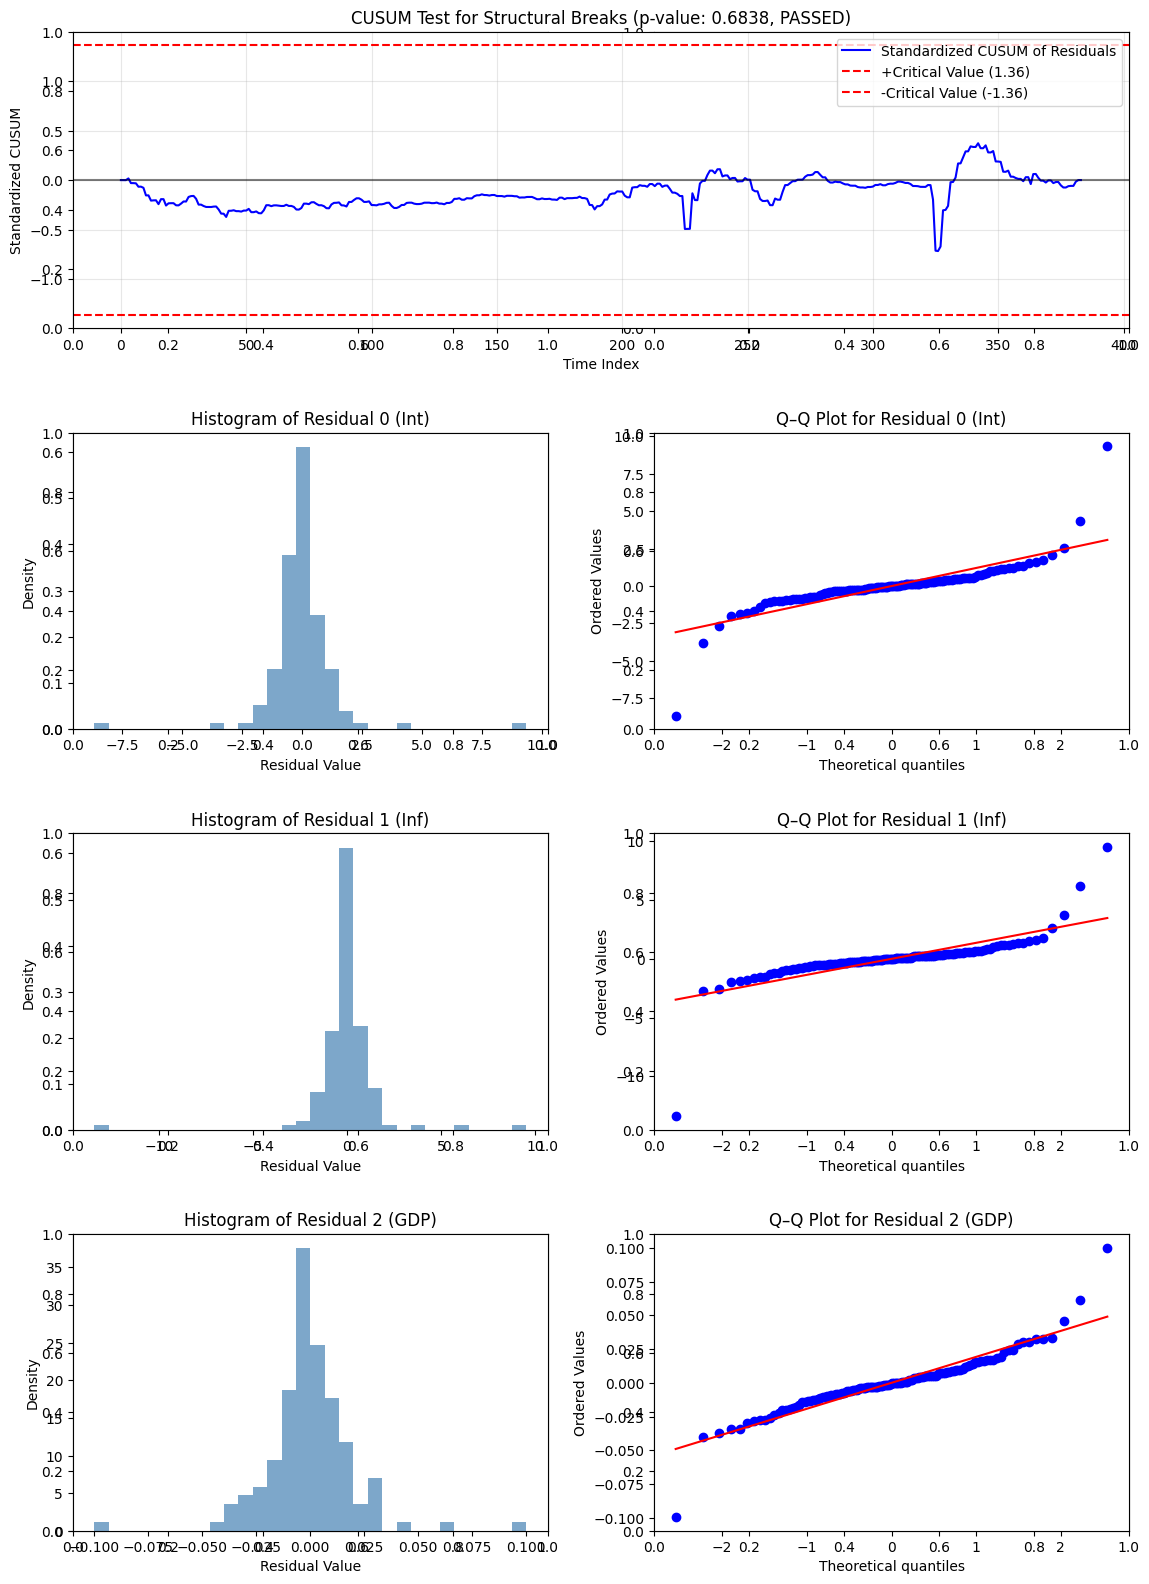

Plots are below


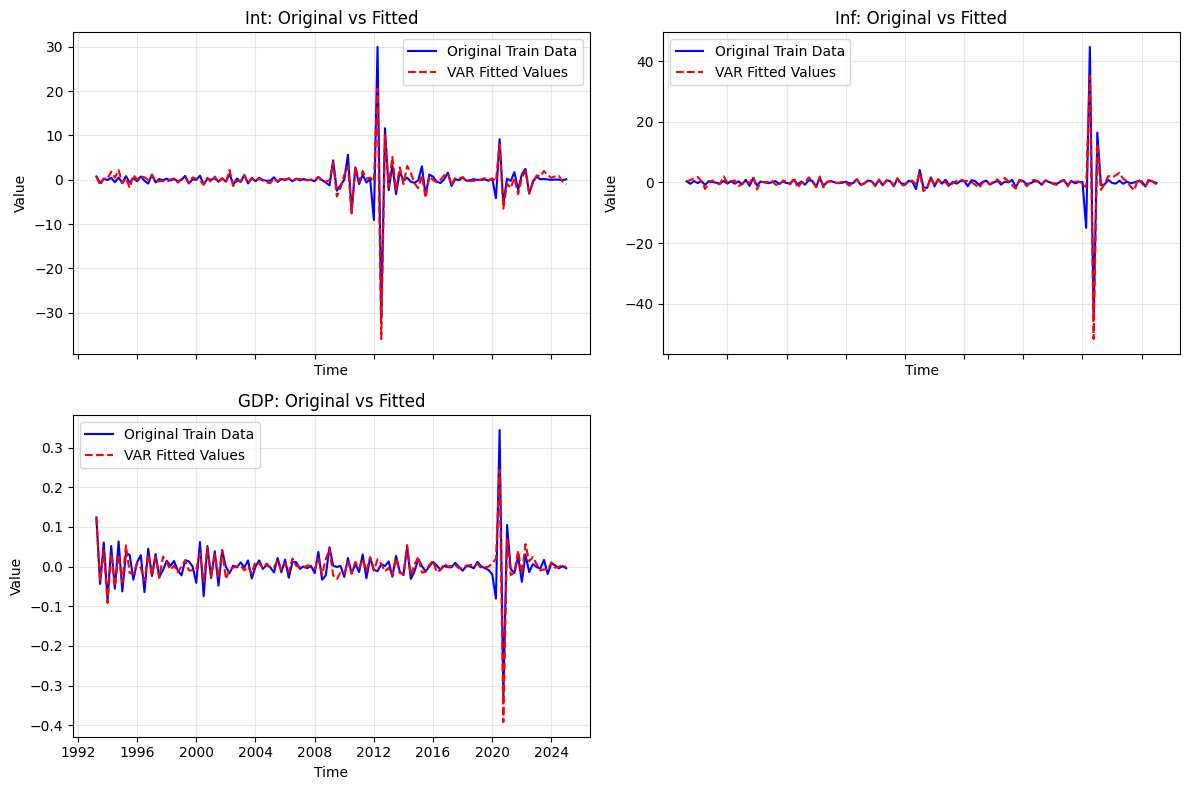

{'p': 10,
 'beta': array([[-5.31150963e-02, -3.38968584e-02,  5.48909638e-04],
        [-2.08267271e+00, -1.50222131e-01, -1.33336189e-03],
        [-7.13069585e-02, -2.58480083e+00, -9.88069117e-03],
        [ 1.39869456e+01,  3.26746613e+01, -9.47362838e-01],
        [-2.78466990e+00, -4.10780482e-01, -4.05288183e-03],
        [-1.80184857e-01, -3.76485322e+00, -2.01175051e-02],
        [ 2.73371729e+01,  3.61513171e+01, -6.52614424e-01],
        [-3.02602147e+00, -6.69556655e-01, -6.45907345e-03],
        [-3.05520293e-01, -4.31536084e+00, -2.42841013e-02],
        [ 2.81148659e+01,  1.91260074e+01, -7.17910326e-01],
        [-2.86945491e+00, -8.52025927e-01, -8.39624824e-03],
        [-5.94746436e-01, -4.39789843e+00, -2.54337108e-02],
        [ 4.42899299e+01,  1.16100780e+01, -6.55466650e-01],
        [-2.57924935e+00, -9.08071486e-01, -9.26166447e-03],
        [-7.60259819e-01, -3.99345200e+00, -2.25578483e-02],
        [ 4.73011750e+01,  2.62366134e+00, -6.36113904e-01],
      

In [27]:
vm.fit(p=10)

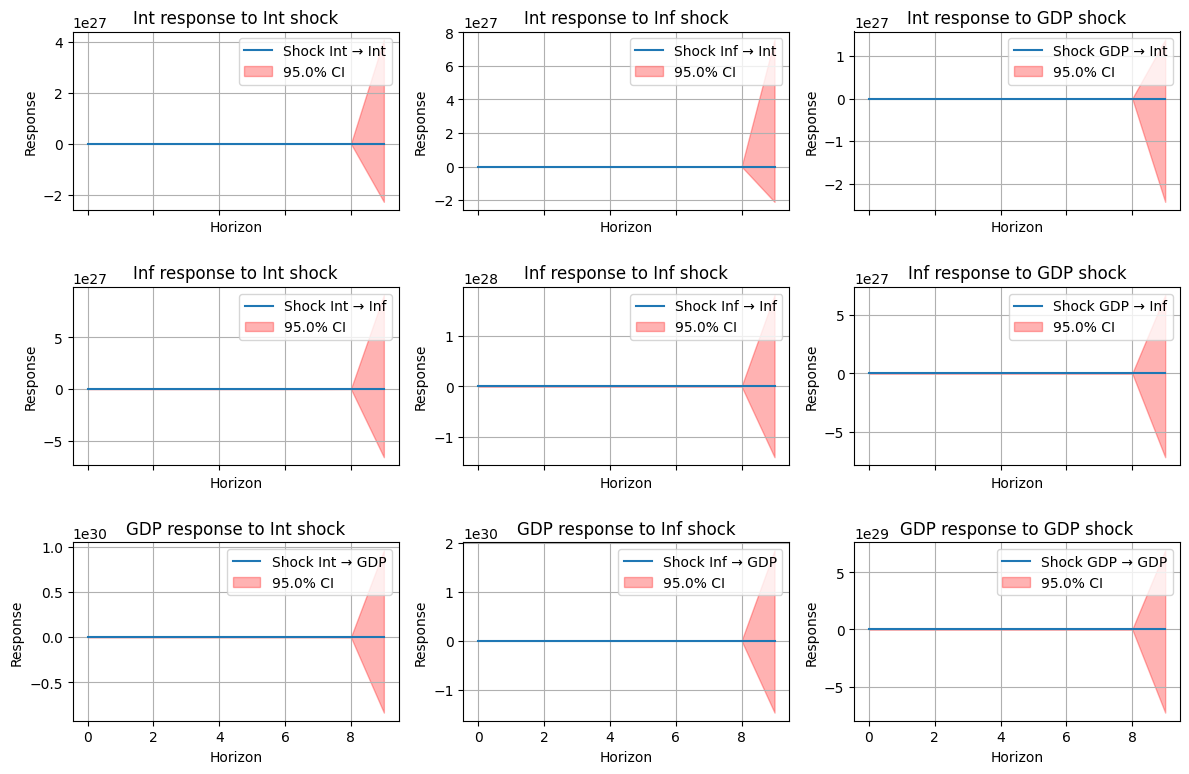

(array([[[ 1.46620744e+00,  0.00000000e+00,  0.00000000e+00],
         [ 3.38272431e-01,  1.75534336e+00,  0.00000000e+00],
         [ 2.29764063e-03,  1.58554707e-02,  1.26804379e-02]],
 
        [[-3.10444930e+00, -2.63712561e-01, -1.69076126e-05],
         [-9.78940357e-01, -4.53736963e+00, -1.25291491e-04],
         [ 3.15585242e+01,  5.73402288e+01, -1.20129757e-02]],
 
        [[ 2.34866265e+00,  4.33259966e-01,  1.86599057e-05],
         [ 9.02134001e-01,  4.57151117e+00,  1.88656909e-04],
         [-5.29962202e+01, -1.42819924e+02, -1.22513287e-03]],
 
        [[-7.00542414e-01, -2.08232308e-01, -2.36663925e-07],
         [-2.73390213e-01, -2.03500047e+00, -6.83773269e-05],
         [ 1.93721679e+01,  1.15634074e+02,  1.33070614e-03]],
 
        [[ 1.28493028e-01,  4.95884908e-02, -9.32542850e-06],
         [-1.41426563e-01,  2.64695617e-01, -1.03134956e-05],
         [ 3.45248752e+01, -2.36281851e+01,  2.07262029e-03]],
 
        [[-2.88379768e-01, -6.67436706e-02,  5.38213949

In [31]:
vm.impulse_res(plot=True,orth=True,bootstrap=True)